# Notebook: Using `RailEnv`

In this notebook, we will see how to create, interact with and render railway systems.

You can run this document as an interactive notebook in one click:
[![Open In Binder](https://mybinder.org/static/images/badge_logo.svg)](https://mybinder.org/v2/gh/MasterScrat/getting-started/master?filepath=notebook_1.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MasterScrat/getting-started/blob/master/notebook_1.ipynb)

# Setup

In [1]:
# Install Flatland
%cd /content
!git clone https://gitlab.aicrowd.com/flatland/flatland.git/
%cd flatland
!pip install -e .

# The big picture

Let's first go over the main use cases of `RailEnv`, the Flatland environment. Additional details will be provided in the second section.

In [0]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import random_rail_generator

# Build a random 15x15 rail networks from a list of probability per cell type
transition_prob = [
    1.0,  # Type 0 - empty cell
    1.0,  # Type 1 - straight
    1.0,  # Type 2 - simple switch
    0.3,  # Type 3 - diamond crossing
    0.5,  # Type 4 - single slip
    0.5,  # Type 5 - double slip
    0.2,  # Type 6 - symmetrical
    0.0,  # Type 7 - dead end
    0.2,  # Type 8 - turn left
    0.2,  # Type 9 - turn right
    1.0  # Type 10 - mirrored switch
]

rail_generator = random_rail_generator(cell_type_relative_proportion=transition_prob)

random_env = RailEnv(
    width=15,
    height=15,
    rail_generator=rail_generator,
    number_of_agents=1
)

# Call reset() to initialize the environment
observation, info = random_env.reset()

/content/flatland/flatland/utils/rendertools.py:460: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


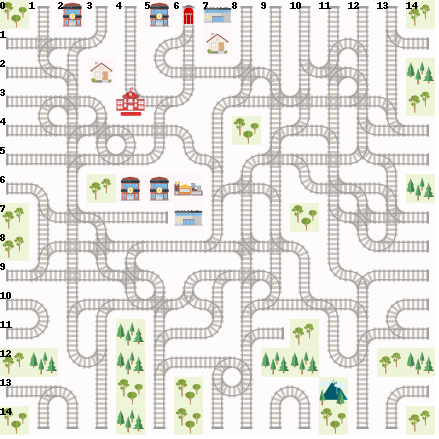

In [3]:
import PIL
from flatland.utils.rendertools import RenderTool

# Render the environment
def render_env(env):
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)

render_env(random_env)

In [4]:
import numpy as np

# By default, the environment provides global observations
for agent_handle in random_env.get_agent_handles():
    print('Observations for agent {}:'.format(agent_handle))
    agent_obs = observation[agent_handle]

    print('- Transition map\n{}\n'.format(np.transpose(agent_obs[0], (2, 0, 1))))
    print('- Agent position\n{}\n'.format(np.transpose(agent_obs[1], (2, 0, 1))))
    print('- Agent target \n{}\n'.format(np.transpose(agent_obs[2], (2, 0, 1))))

Observations for agent 0:
- Transition map
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 1. 1. 0.]
  [0. 0. 1. ... 1. 1. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 1. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0.

/content/flatland/flatland/utils/rendertools.py:460: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


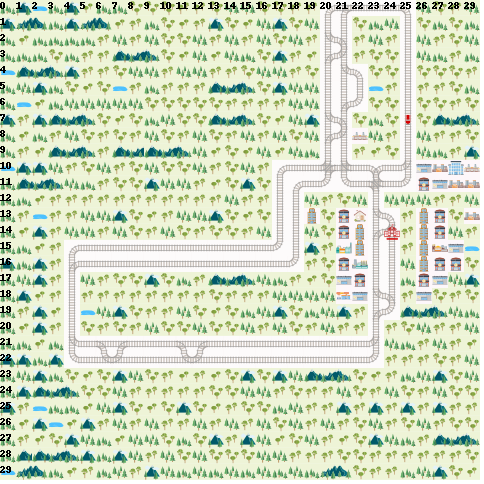

In [5]:
from flatland.envs.rail_generators import sparse_rail_generator

# More realistic networks can be built using sparse_rail_generator
sparse_env = RailEnv(
    width=30,
    height=30,
    rail_generator=sparse_rail_generator(
        max_num_cities=3,  # Number of cities (= train stations)
        grid_mode=False,  # Distribute the cities evenly in a grid
        max_rails_between_cities=2,  # Max number of rails connecting to a city
        max_rails_in_city=3  # Number of parallel tracks in cities
    ),
    number_of_agents=1
)

observation, info = sparse_env.reset()

render_env(sparse_env)

In [0]:
import numpy as np
from flatland.envs.rail_generators import rail_from_manual_specifications_generator

# Environments can also be created from fixed configurations
# Here we define a 6x4 railway from a 2D array
specs = [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (7, 0), (0, 0)],
         [(7, 270), (1, 90), (1, 90), (1, 90), (2, 90), (7, 90)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

rail_shape = np.array(specs).shape

fixed_env = RailEnv(
    width=rail_shape[1],
    height=rail_shape[0],
    rail_generator=rail_from_manual_specifications_generator(specs),
    number_of_agents=1
)

observation, info = fixed_env.reset()

In [0]:
# A real controller would be implemented here
class RandomController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action = np.random.randint(self.action_size)
            actions.update({agent_handle: action})
        return actions

In [0]:
from IPython.display import clear_output

# The environment provides a gym-like interface.
def run_episode(env):
    controller = RandomController(env.action_space[0])
    observations, info = env.reset()

    score = 0
    actions = dict()

    for step in range(50):
        clear_output(wait=True)

        actions = controller.act(observations)
        next_observations, all_rewards, dones, _ = env.step(actions)

        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]

        render_env(env)
        print('Timestep {}, total score = {}'.format(step, score))

        if dones['__all__']:
            print('All done!')
            return

    print("Episode didn't finish after 50 timesteps.")

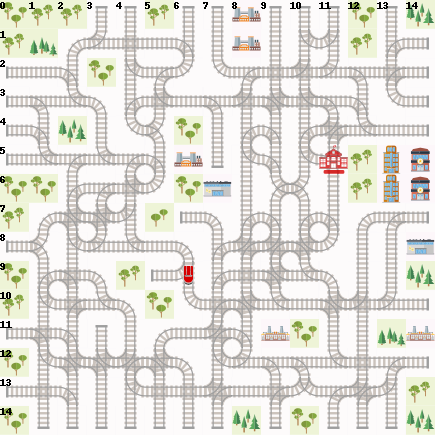

Timestep 49, total score = -50.0
Episode didn't finish after 50 timesteps.


In [9]:
# Run an episode in the random environment
run_episode(random_env)

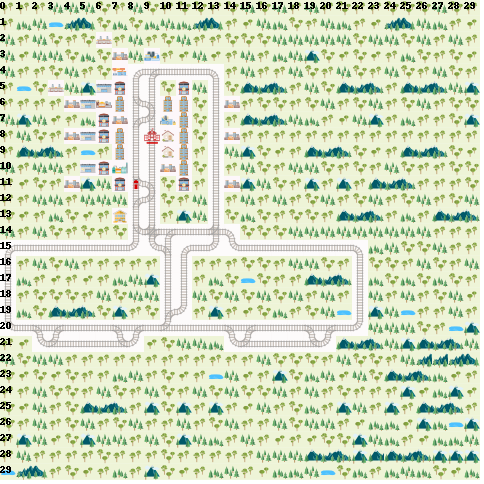

Timestep 49, total score = -50.0
Episode didn't finish after 50 timesteps.


In [10]:
# Run an episode in the sparse environment
run_episode(sparse_env)

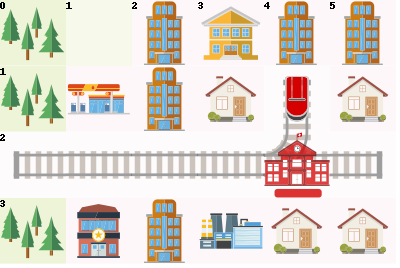

Timestep 1, total score = 0.0
All done!


In [11]:
# Run an episode in the fixed environment
run_episode(fixed_env)

# In more details

Let's now dive into more details about some of the points mentioned above.

The basic usage of the `RailEnv` environment consists in creating a `RailEnv` object endowed with
-  a **rail generator**, that generates new rail networks on each reset,
- an **observation generator**, that provides a suitable observation vector to the agents. 

As we have seen above, the environment provides very complete observations by default. You typically won't use this object as-is. One of the main objectives of the Flatland challenge is to **find suitable observations** to solve the task at hand. We will see how this works in the next notebook.

For now, let's see more precisely how we can create rail networks and use them to train agents.

Generating rail networks
---

There are multiple ways to generate a rail network. The simpler one is to describe it explicitely cell by cell:

In [0]:
specs = [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (7, 0), (0, 0)],
         [(7, 270), (1, 90), (1, 90), (1, 90), (2, 90), (7, 90)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

`specs` is a 2-dimensional array of tuples

In [13]:
rail_shape = np.array(specs).shape
rail_shape

(4, 6, 2)

This `specs` array represent a 4x6 2D grid of tuples. In each tuple, the first element represent the **cell type**, and the second the **rotation** of the cell (0, 90, 180 or 270 degrees clockwise).

The following image gives an overview of the eight basic cell types. These can be rotated in steps of 45° and mirrored along the North-South of East-West axis.

![cell types](https://github.com/MasterScrat/getting-started/blob/master/assets/transitions.png?raw=1)


Here's the full list of cell types. This list can be found in `flatland.core.grid.rail_env_grid.RailEnvTransitions`

```
transition_list = [int('0000000000000000', 2),  # empty cell - Case 0
                   int('1000000000100000', 2),  # Case 1 - straight
                   int('1001001000100000', 2),  # Case 2 - simple switch
                   int('1000010000100001', 2),  # Case 3 - diamond drossing
                   int('1001011000100001', 2),  # Case 4 - single slip
                   int('1100110000110011', 2),  # Case 5 - double slip
                   int('0101001000000010', 2),  # Case 6 - symmetrical
                   int('0010000000000000', 2),  # Case 7 - dead end
                   int('0100000000000010', 2),  # Case 1b (8)  - simple turn right
                   int('0001001000000000', 2),  # Case 1c (9)  - simple turn left
                   int('1100000000100010', 2)]  # Case 2b (10) - simple switch mirrored
```

The `RailEnv` constructor accepts a `rail_generator` parameter, which is used to generate the rail networks. When creating fixed networks, we use the `rail_from_manual_specifications_generator`.

In [0]:
fixed_env = RailEnv(
    width=rail_shape[1],
    height=rail_shape[0],
    rail_generator=rail_from_manual_specifications_generator(specs),
    number_of_agents=1
)

A call to `reset()` is necessary to fully initialize the environment. As usual with gym-like environment, this returns the initial observation.

In [0]:
observations, info = fixed_env.reset()

This result in a fixed rail network:

/content/flatland/flatland/utils/rendertools.py:460: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


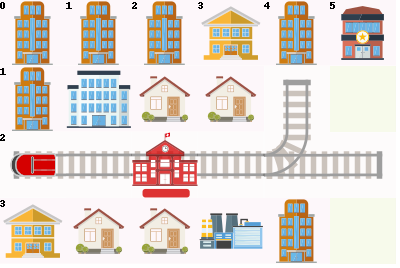

In [16]:
render_env(fixed_env)

We can also create a randomly generated network using `random_rail_generator`. In this case, we can optionally specify the probability of each cell type, using the same list as described before. This results in a rail network that is different every time `reset()` is called.

/content/flatland/flatland/utils/rendertools.py:460: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


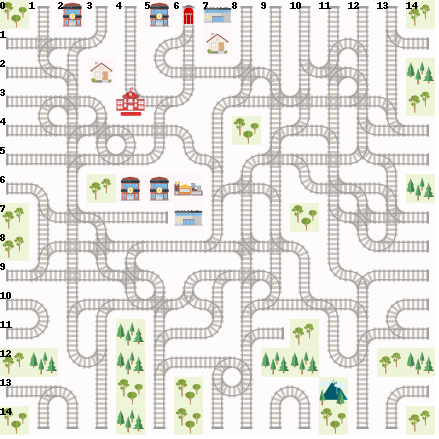

In [17]:
transition_prob = [
    1.0,  # Type 0 - empty cell
    1.0,  # Type 1 - straight
    1.0,  # Type 2 - simple switch
    0.3,  # Type 3 - diamond crossing
    0.5,  # Type 4 - single slip
    0.5,  # Type 5 - double slip
    0.2,  # Type 6 - symmetrical
    0.0,  # Type 7 - dead end
    0.2,  # Type 8 - turn left
    0.2,  # Type 9 - turn right
    1.0  # Type 10 - mirrored switch
]

random_env = RailEnv(
    width=15,
    height=15,
    rail_generator=random_rail_generator(cell_type_relative_proportion=transition_prob),
    number_of_agents=1
)

observations, info = random_env.reset()

render_env(random_env)

Running an agent
--

`RailEnv` is targeted at multi-agents experiments. For this purpose, it is derived from RLLib's `MultiAgentEnv` class. You can [read more details about it here](https://ray.readthedocs.io/en/latest/rllib-env.html).

The environment is run by supplying the `step` function with a **dictionary** of actions, whose keys are agents’ handles and the corresponding values are the selected actions. This dictionary is passed to the environment which checks the validity of all actions and update the environment state.

The environment returns an array of new observations, a reward dictionary for all the agents as well as a flags indicating which agents are done. This information can be used to update the policy of your agent and if `done[‘__all__’] == True` the episode terminates.

In [18]:
from flatland.envs.rail_env import RailEnvActions

controller = RandomController(random_env.action_space[0])
observations, info = random_env.reset()
actions = controller.act(observations)

# Perform a single action per agent
for (handle, action) in actions.items():
    print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))
    next_obs, all_rewards, dones, info = random_env.step({handle: action})

print('Rewards for each agent: {}'.format(all_rewards))
print('Done for each agent: {}'.format(dones))
print('Misc info: {}'.format(info))

Agent 0 will perform action 0 (B)
Rewards for each agent: {0: -1.0}
Done for each agent: {0: False, '__all__': False}
Misc info: {'action_required': {0: True}, 'malfunction': {0: 0}, 'speed': {0: 1.0}, 'status': {0: <RailAgentStatus.READY_TO_DEPART: 0>}}


In the example above, we use `env.get_agent_handles()` to enumerate through the handles, and `RailEnvActions.to_char` to get a symbol representing the agent's direction: **B**ackward, **F**orward, **L**eft, **R**ight or **S**top.

In [0]:
RailEnvActions??